# Lab 2: Revision of Python, Introduction to Jupyter Notebooks (2)

In today's lab we'll revise some more Python fundamentals as well as learn how to plot simple diagrams.

**Please enter your name and student number in the markdown cell below**

* Name: Saashiv Valjee
* SID: 190288688


## Importing from modules

Python allows programmers to bundle up collections of variables, functions, and other objects such as classes into *modules* that can easily be imported into other projects. One reason Python is such an attractive programming language is the enormous library of modules to help with almost any imaginable type of calculation.

There are a few variations on the syntax to import part or all of a module. These make more sense when discussing a particular example, so let's take the case of the square root function `sqrt()`. This isn't included by default when Python is loaded, but is available in the `numpy` module.

* `import numpy` will import the whole `numpy` module. The `sqrt()` function will be available by typing `numpy.sqrt()`.
* `import numpy as np` will do the same, but calling the module `np` instead: *i.e.*, you should type `np.sqrt()`. This is convenient if you will use many parts of the module and/or it has a long name.
* `from numpy import sqrt` will import *only* the `sqrt()` function. It will be available without any prefix (*i.e.*, you should just type `sqrt()`). We say that this function has been imported into the *main namespace*.

You can type `from numpy import *` to import *all* of the parts of a module into the main namespace. However, this isn't recommended usage, because it can have unintended consequences. To see what can happen, **evaluate the following code.** Can you explain the output?

In [1]:
e = 3
from numpy import *
print(e)

2.718281828459045


the reason for this is because e was later definited to eulers number and has overridden the previous definition of e

Now go to the `Kernel` menu at the top of the page and click `Restart` to clear the effects of that `import`!

## `while` loops: running while a condition is true

Sometimes we don't know how many steps a loop should run for in advance. For instance, if we're searching for the best possible fit between our data and some model, we should iterate until the quality of the fit no longer improves. This is where a `while` loop comes in handy. 

As a very simple example to demonstrate syntax, evaluate the following code:

In [1]:
n = 5
while n > 0:
    print(n)
    n -= 1 # short for n = n - 1

5
4
3
2
1


You can see that the loop continues to run only while the condition `n > 0` is true. Of course, this is a rather artificial example, because we could have predicted in advance that the loop would run five times, so there is no reason not to use a `for` loop.

Before we see a more realistic example, let’s look at a new data type.

## Tuples

Tuples are very much like lists, except that they use round brackets `()` rather than square, and that they are *immutable* (cannot be changed). To see this, try evaluating the following code and note the error message:

In [2]:
my_list = [1, 2, 3]
my_list[0] = 100

my_tuple = (1, 2, 3)
my_tuple[0] = 100

TypeError: 'tuple' object does not support item assignment

For many purposes they can be used in the same way as lists. One good use is if we want to return more than one value from a function: *each function call can only return one object*, but if that object is a tuple, it can contain as many individual elements as we like.

Tuples will be automatically created even without the round brackets in certain contexts when objects are separated by commas; this feature is known as tuple *packing*:

In [3]:
my_tuple = 1, 2, 3
print(my_tuple)

(1, 2, 3)


Similarly and in the opposite direction, we can *unpack* tuples: 

In [4]:
a, b, c = my_tuple
print(a)

1


Combining these features comes in handy when we are investigating mathematical sequences. Suppose that we are investigating two sequences $a_n$ and $b_n$, which follow the rule that $a_{n+1} = b_n + 1$ and $b_{n+1} = a_n + 1$. **The following would be the *wrong* way to do this: can you see why?**

In [5]:
# Some initial values
a = 1
b = 2

a = b + 1
b = a + 1

print(a, b)

3 4


We update `a` *before* `b`, so in fact mathematically we are evaluating $a_{n+1} = b_n + 1$ and $b_{n+1} = a_{n+1} + 1$.

The following is correct but a bit inelegant:

In [0]:
# Some initial values
a = 1
b = 2

temp_a = a       # Save the value of a for later
a = b + 1        # Now we can update a ...
b = temp_a + 1   # ... and still calculate the correct new value for b.

print(a, b)

But with tuple packing and unpacking, this becomes rather easier:

In [0]:
# Some initial values
a = 1
b = 2

a, b = b + 1, a + 1 # One step!

print(a, b)

To show you understand this, try evaluating the following sequence using tuple packing:

$$a_{n+1} = \tfrac12(a_n+b_n) \qquad b_{n+1} = \sqrt{a_nb_n} \qquad c_{n+1} = c_n - \tfrac14d_n(a_n-b_n)^2
\qquad d_{n+1} = 2d_n$$

* Start from the values $a_0 = 1$, $b_0 = 1/\sqrt{2}$, $c_0 = \frac14$, $d_0 = 1$, 
* **use a `while` loop to follow the rule above until** $|a_n - b_n| < 10^{-7}$. 
* You will need to import the `sqrt` function from the `numpy` module and use a built-in or `numpy` function for the absolute value.
* For each step in your while loop print, $a, b, c, d,$ and $a-b$. 

After the loop has terminated then **calculate** $$ p = \frac{(a_n + b_n)^2}{4c_n} .$$

What do you notice?




In [58]:
from numpy import *

a = 1
b = 1/sqrt(2)
c = 1/4
d = 1
k = a - b, a-b

while (abs(a-b))>10**(-7):
    a, b, c, d, k = 1/2*(a+b), sqrt(a*b), c - (1/4)*d*(a-b)**2, 2*d, a-b
    print(a,b,c,d,k)
    print('----------')

print(a,b,c)
p = (a+b)**2/(4*c)
print(p)

#i notice that p is pi

0.8535533905932737 0.8408964152537145 0.22855339059327376 2 0.29289321881345254
----------
0.8472249029234942 0.8472012667468914 0.22847329108090064 4 0.012656975339559229
----------
0.8472130848351929 0.8472130847527654 0.2284732905222318 8 2.363617660272599e-05
----------
0.8472130848351929 0.8472130847527654 0.2284732905222318
3.141592653589794



Before discussing this checkpoint with a demonstrator please do the following:
- ensure the code is working properly, especially the boldface type questions
- ensure you understand how the code you have written works (e.g., the structure, data types, algorithm....etc).
- ensure you have answered the question asked, calculating the value of $p$ after the algorithm has converged (*i.e.*, the loop has finished).

Experiment with editing and running code to build intuition about how it functions. 

When you are ready call over a demonstrator to do your checkpoint.

▶ **CHECKPOINT 1**

## Visualisation

Modern computers have made visualisation so easy that it should be the first step of almost any data analysis: it is far easier to see what is going on from a picture than from, say, a table of numbers.

We will use the `matplotlib` package to make pictures, which plays very nicely with Jupyter notebooks. In fact in this lab we will specifically be using the `pyplot` submodule: this is designed to behave similarly to MATLAB plotting, and contains all the functionality we will need for now.

Let's start by evaluating a "magic" command that allows plots to be written directly to our notebook:

In [18]:
%matplotlib inline

**Note that we only need to do this once:** then plots will be displayed “inline” for the rest of the session.

*Note:  there is another magic command that allows for interactive plots in classic jupyter notebooks; `%matplotlib notebook`.  While tremendously useful, this command is not supported by the Cocalc environment.  Using it will give errors.  An example is included at the end of this script, should you wish to use code elsewhere (e.g., on your own laptop).


Next, we need to import the `plot` and `figure` functions:

In [19]:
from matplotlib.pyplot import figure, plot

Let's now consider how to plot a mathematical function. By far the easiest way to do this involves a new data type, provided by the `numpy` package, called an `array`. We will actually generate the array using the `linspace()` function, and the function we want to plot (say) is $\cos(x)$, or `cos()`. These can be imported into the namespace using the following.

In [20]:
from numpy import linspace, pi, cos

Suppose we want to plot $\cos x$ from $-2\pi$ to $2\pi$. The first step is to generate a set of $x$ values in this range, which is the job of `linspace`. We can get 50 evenly spaced $x$ points by:

In [22]:
x = linspace(-2*pi, 2*pi, 50)

If you evaluate a cell containing simply `x`, you will see what type `x` is and what it contains.  In this case you see that `x` is an `array`: 

In [23]:
x

array([-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913,
       -5.00090259, -4.74444605, -4.48798951, -4.23153296, -3.97507642,
       -3.71861988, -3.46216333, -3.20570679, -2.94925025, -2.6927937 ,
       -2.43633716, -2.17988062, -1.92342407, -1.66696753, -1.41051099,
       -1.15405444, -0.8975979 , -0.64114136, -0.38468481, -0.12822827,
        0.12822827,  0.38468481,  0.64114136,  0.8975979 ,  1.15405444,
        1.41051099,  1.66696753,  1.92342407,  2.17988062,  2.43633716,
        2.6927937 ,  2.94925025,  3.20570679,  3.46216333,  3.71861988,
        3.97507642,  4.23153296,  4.48798951,  4.74444605,  5.00090259,
        5.25735913,  5.51381568,  5.77027222,  6.02672876,  6.28318531])

One key feature of this data type is that *we can apply mathematical functions to every element at once.* So to calculate our `y` values, we simply type:

In [24]:
y = cos(x)

Then plotting is as simple as

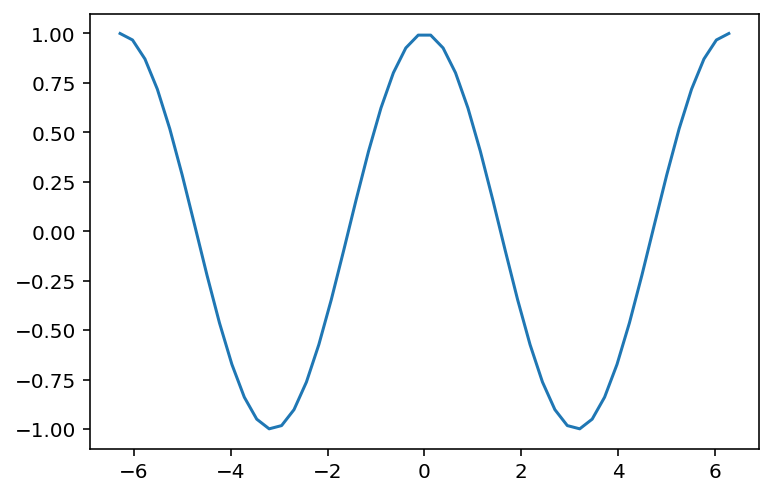

In [25]:
figure()
plot(x,y)

**Using this functionality, plot $y = \tanh(x)$ from –5 to 5. Put gridlines on your graph.** 

*Hint:* you can import almost any mathematical function you can think of, including `tanh()` from `numpy`.  There are also several options in `matplotlib.pyplot` that will improved the presentation of the plot.  For example, the `grid()` function from this submodule will apply gridlines, the `xlabel(string)` function will label the x-axis with `string`, `ylabel(string)` and `legend()` do what you might expect, and there are many others.  You could limit the range of $x$ or limit the range of values shown in the plot using `xlim()` or `ylim()`.  Try a few of these options.


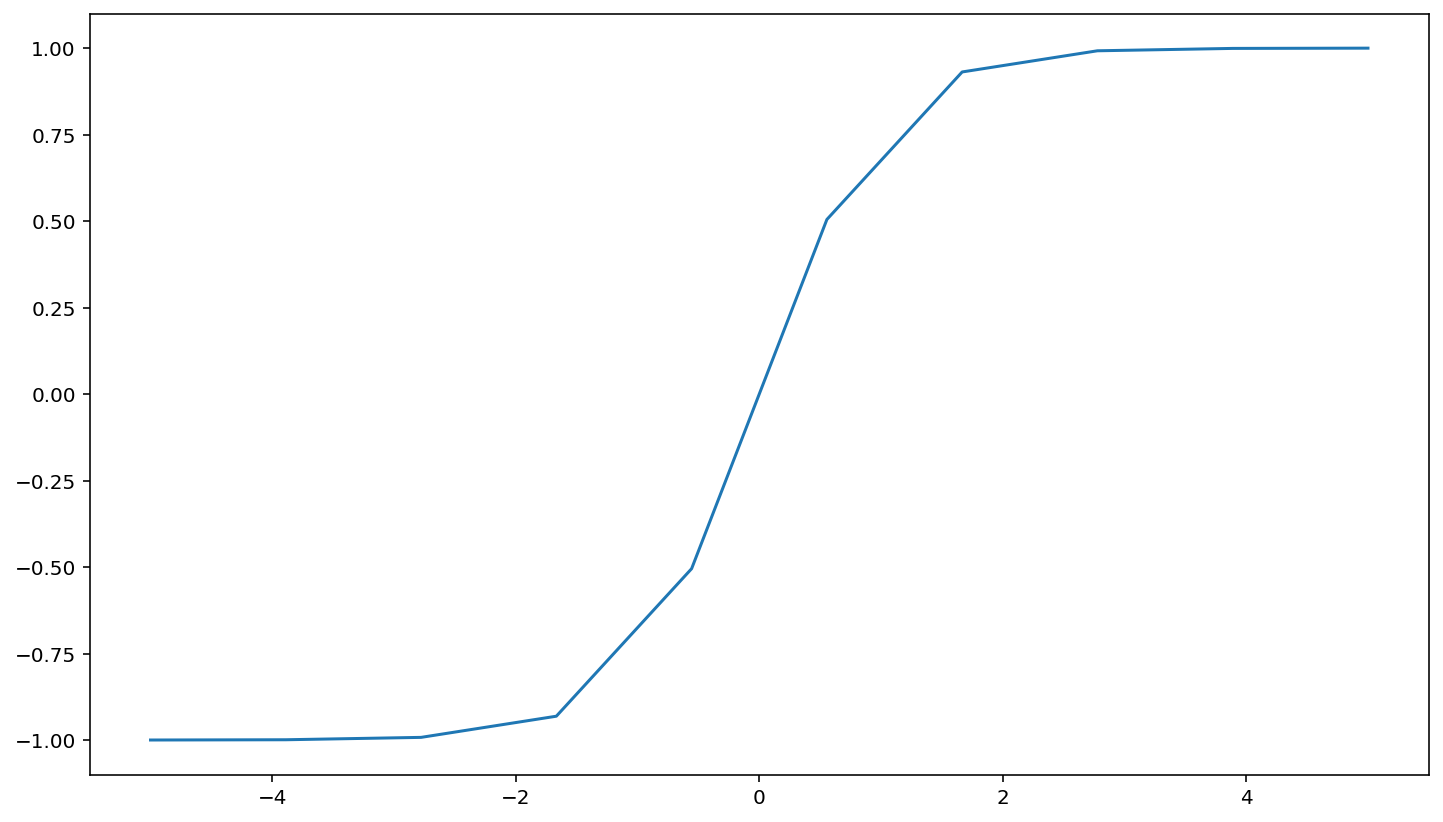

In [2]:
from matplotlib.pyplot import figure, plot
from numpy import linspace, pi, cos, tanh

x = linspace(-5,5,10)
y = tanh(x)

figure()
plot(x,y)

The `numpy` package and `array` type are very useful in scientific analysis and we will repeatedly return to them during this module.

## An Example: Collatz Conjecture
Here we will use plots and `while` loops to investigate the [*Collatz conjecture*](https://en.wikipedia.org/wiki/Collatz_conjecture).  Follow this link for more information and the history of this conjecture.

The Collatz Conjecture involves a simple rule for generating a sequence of integers:

- If $n_0$ is even, halve it: $n_1 = n_0/2$.
- If $n_0$ is odd, multiply by three and add one: $n_1 = 3n_0 + 1$.

We generate $n_2$ from $n_1$ in the same way, and so on. 

The conjecture is that no matter what the starting value, the sequence will eventually reach 1. This has never been proven true, nor has any counterexample been found.

**Complete the following code for a function to perform one Collatz step.**

In [3]:
def collatz_step(n):
    """Returns the next step in the Collatz sequence, starting from n."""
    if n % 2 == 0: # the % operator on integers gives the remainder after division.
        return n // 2 # the // operator performs *integer* division. 
    if n % 2 != 0:
        return 3*n + 1


Now we can use a `while` loop to see a sample sequence. **Write a `while` loop that will set `n` to the next value given by `collatz_step` until it reaches 1, printing the value of `n` at each step.**

In [4]:
n = 12
steps = 0
while n != 1:
    n = collatz_step(n)
    print(n)
    steps += 1

print('steps: ', steps)

6
3
10
5
16
8
4
2
1
steps:  9


may have accidentally deleted task cell, task was to find n in 0 < n < 1000 that uses the most steps to return to 1

In [5]:
def collatz_step(n):
    count = 0
    while n != 1:
        if n % 2 == 0:
            n = n // 2  
        elif n % 2 != 0:
            n = 3*n + 1
        count += 1
    return count
        
list_of_numbers = []
for x in range(1,1001):
    list_of_numbers.append(x)
    
lists = list(map(collatz_step, list_of_numbers))
print('maximum number of steps for a single number under 1000:', max(lists))

index = 0
for i in lists:
    if i != max(lists):
        index += 1
    else:
        break

print('the number that corresponds to', max(lists), 'steps is', index + 1)

maximum number of steps for a single number under 1000: 178
the number that corresponds to 178 steps is 871


▶ **CHECKPOINT 2**

This sequence would be easier to understand if we could visualise its trajectory. Let’s record each number that the sequence passes through on its way to 1.

**Modify your `while` loop to create a list of every number in the Collatz sequence, starting from the value of $n_0$ you determined above.**

*Hint:* Start by creating a list `collatz_history = [n]`, where `n` is the starting number; then use the `append` method to add an item to this list for every cycle through the loop.

In [6]:
def collatz_step(n):
    """Returns the next step in the Collatz sequence, starting from n."""
    if n % 2 == 0: # the % operator on integers gives the remainder after division.
        return n // 2 # the // operator performs *integer* division. 
    if n % 2 != 0:
        return 3*n + 1

n = 12
collatz_history = [n]
steps = 0
while n != 1:
    n = collatz_step(n)
    print(n)
    collatz_history.append(n)
    steps += 1

print('list is', collatz_history)
print('steps: ', steps)

6
3
10
5
16
8
4
2
1
list is [12, 6, 3, 10, 5, 16, 8, 4, 2, 1]
steps:  9


Let’s examine that list:

In [7]:
print(collatz_history)

[12, 6, 3, 10, 5, 16, 8, 4, 2, 1]


Impressive, but it would be much easier to understand if we plotted it...

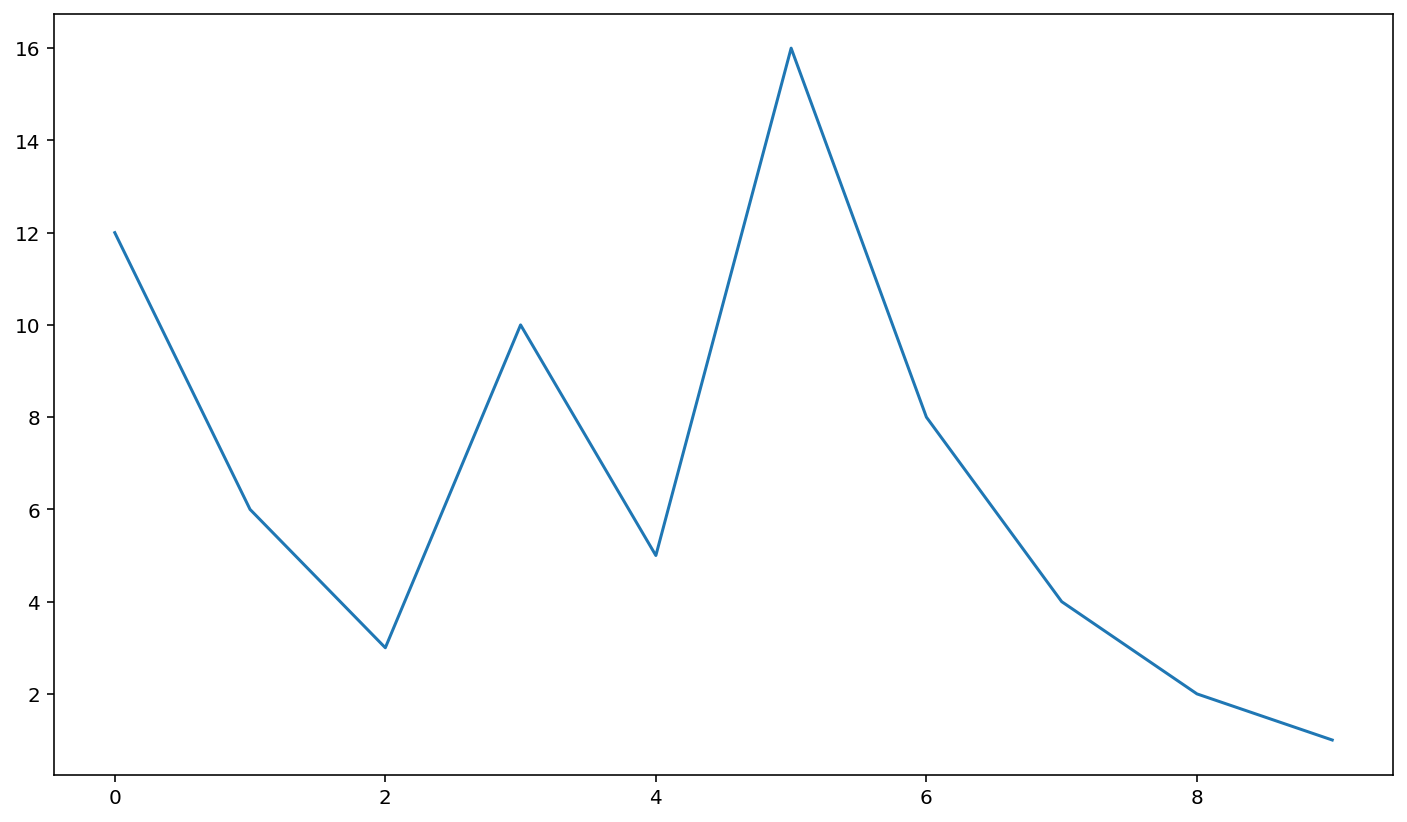

In [8]:
figure()
plot(collatz_history)

That gives a much better picture of what is going on: you can see how the value gradually rises until the sequence hits a number that is a multiple of some high power of 2, when the "halving" step makes it decrease rapidly.

(You don’t actually even need the `figure` function above; the `plot` function will make a new figure if none is open, or plot to the most recent figure if it is still open for input: that is, if you haven’t yet pressed that “power” button. Because this can be confusing if the most recent figure is a long way back in the notebook, I recommend always explicitly creating a new figure with `figure` if you want one.)

You can see that the `plot` function called with just a list as argument plots that list against the sequence number (that is, the first element is plotted at $x = 0$, the second at $x = 1$, and so forth).

Let's find out a bit more about the `plot` function. Recall that `Shift`+`Tab` is a convenient way to load the documentation for a function. So **put the cursor after the opening bracket of `plot(` in the cell above and press `Shift`+`Tab` to see what happens.**

You will see from the inline documentation that the `plot` function can also take a string argument that specifies how to format the plot. Some codes you can use are listed in the table below (full list in the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)); you can specify the colour, marker style, line style, or any combination of these.

 character | meaning 
--------| ------
`'b'` |	blue
`'g'` |	green
`'r'` |	red
`'k'` |	black
`'.'` |	point marker
`'o'` |	circle marker
`'s'` |	square marker
`'*'` |	star marker
`'+'` |	plus marker
`'x'` |	x marker
`'-'` |	solid line style
`'--'`| 	dashed line style
`'-.'`| 	dash-dot line style
`':'` |	dotted line style

Try using this to **plot the Collatz sequence starting from 12, using red circles joined by a dashed line.** Note from the documentation you saw that the syntax you want is `plot(list, format_string)`.

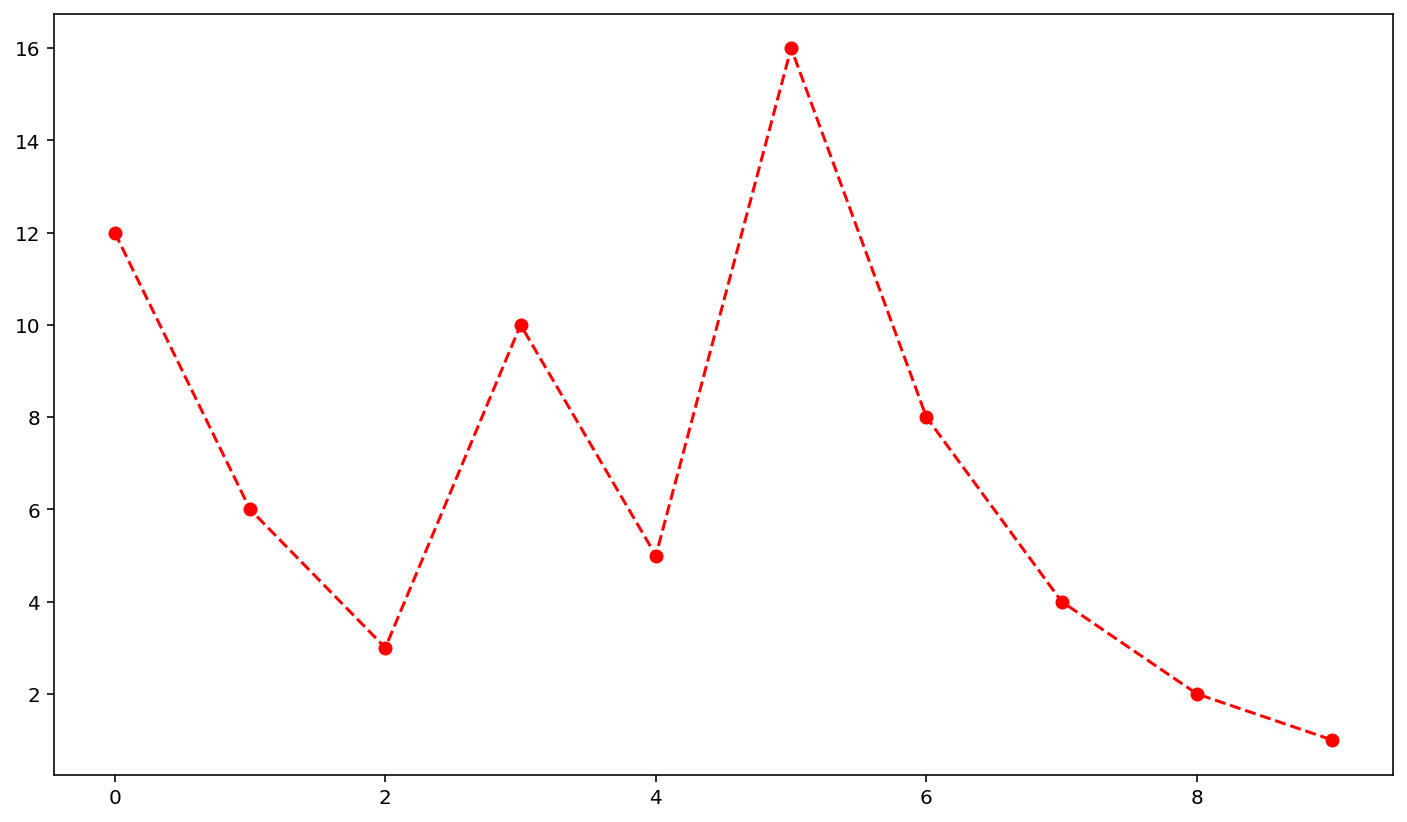

In [9]:
figure()
plot(collatz_history, 'ro--')



Return to your Collatz conjecture code and **find the value of $n \leq 1000$ that reaches the *highest number*** before returning to 1. What is this highest number?

Note:  try to make your code here simple to modify and utilise with a different starting or end point.  That is make your code clear and easily repurposed to slight different problems.

The quiz questions often ask you to modify your lab scripts to solve a slightly different problem.  These questions are most easily and quickly solved if your code is easy to adapt.

In [10]:
'''
global list_of_collatz_numbers
list_of_collatz_numbers = []
global list_of_stuff
list_of_stuff = []

def collatz_step(n):
    list_of_small_stuff = []
    count = 0
    while n != 1:
        list_of_small_stuff.append(n)
        list_of_collatz_numbers.append(n)
        if n % 2 == 0:
            n = n // 2
        elif n % 2 != 0:
            n = 3*n + 1
        count += 1
    return max(list_of_small_stuff)

list_of_numbers = []
#since 1 has no operations, it has no steps and my list of steps will be empty
#this causes an error that we avoid by starting at 2
for x in range(2,1001):
    list_of_numbers.append(x)

lists = list(map(collatz_step, list_of_numbers))
print('maximum number reached: ', max(list_of_collatz_numbers))

#each number in lists represents the maximum number reached using
#using each numbers index + 2 as the starting number for the collatz step

counter = 2
for i in lists:
    if i != max(list_of_collatz_numbers):
        counter += 1
    if i == max(list_of_collatz_numbers):
        print('the number(s) that reached',
              max(list_of_collatz_numbers), 'is', counter)
        break
'''

def collatz_step(n):
    cnlist = []
    count = 0
    while n != 1:
        cnlist.append(n)
        if count == 0:
            OGnumb = n
        if n % 2 == 0:
            n = n // 2
        elif n % 2 != 0:
            n = 3*n + 1
        count += 1
    mxtup = (OGnumb, max(cnlist))
    return(mxtup)

list_of_numbers = []
for x in range(2,1000):
    list_of_numbers.append(x)

lists = list(map(collatz_step, list_of_numbers))

num = 0
for i in lists:
    if num < i[1]:
        num = i[1]
        nnum = i

print(nnum[0] ,',', num)

703 , 250504


## Format strings

This final section is really a matter of aesthetics – but it's nice to be able to make output look well-laid out and professional!

The `format()` function is a string *method* – a function that applies only to strings. It replaces curly brackets `{}` in the string with the values of its arguments. Consider the following simple example:

In [102]:
"{} is a moon of {}".format("Io", "Jupiter")

'Io is a moon of Jupiter'

You can include information in the curly brackets to specify exactly how a value should be converted to a string. This information always comes after a colon `:` and ends with a letter specifying the sort of number that should be printed. Common examples include 

Letter | Meaning
------ | -------
   `f` | floating-point number, usual notation
   `e` | floating-point number, scientific notation
   `d` | integer, decimal
   `s` | string

In between, we can specify the number of spaces that should be left to print the number and, where relevant, the number of decimal places that should be used:

In [12]:
from numpy import pi

list1 = ['pi  = {}', 'pi  = {:.5f}', 'pi  = {:.2f}', 'pi  = {:.2e}', 'pi  > {:d}', 'pie = {:8s}']
list2 = [pi, pi, pi, pi, 3, 'apple']

for i in range(0,6):
    print(list1[i].format(list2[i]))


print('-------------')
print("pi  = {}".format(pi))         # no special format information given
print("pi  = {:10.5f}".format(pi))   # float, 10 spaces, 5 decimal places
print("pi  = {:8.2f}".format(pi))    # float, 8 spaces, 2 decimal places
print("pi  = {:8.2e}".format(pi))    # float, scientific notation, 8 spaces, 2 decimal places
print("pi  > {:8d}".format(3))       # decimal integer, 8 spaces
print("pie = {:8s}".format('apple')) # string, 8 spaces (by default left-aligned)

pi  = 3.141592653589793
pi  = 3.14159
pi  = 3.14
pi  = 3.14e+00
pi  > 3
pie = apple   
-------------
pi  = 3.141592653589793
pi  =    3.14159
pi  =     3.14
pi  = 3.14e+00
pi  >        3
pie = apple   


Put this all together by using an appropriate loop together with the `format` function to **print the following data set**, using the `format` function to ensure that the data lines up attractively.

In [0]:
element_densities = { # densities in g.cm^-3
    'Li': 0.534,
    'Be': 1.8477,
    'B' : 2.34,
    'C' : 2.267,
    'Na': 0.968,
    'Mg': 1.738,
    'Al': 2.70
}

▶ **CHECKPOINT 3**

## Extension 1: Data types, continued

### Dicts

A `dict` (dictionary) is a set of *keys*, each of which has a *value*. Syntatically, these are written using curly brackets `{}`. The keys can be used to index the dict in the same way that numbers are used to index lists and tuples. This can be useful if we want to store information associated with, say, a particular name or ID number:

In [104]:
bank_account = {'Anthony': -0.42, 'Basil': 109287.29}
print(bank_account['Anthony'])

-0.42


Note that dicts do *not* have a guaranteed order, and cannot therefore be indexed by number (unless of course we have specifically defined that number as a key):

In [105]:
bank_account[0]

KeyError: 0

If we try to loop through a dict in the same way as for a list, our variable runs through the *keys* of the dict:

In [108]:
day_length = { # planetary day length in hours
"Mercury": 1408, 
"Venus": 5832, 
"Earth": 24, 
"Mars": 25, 
"Jupiter": 10, 
"Saturn": 11, 
"Uranus": 17, 
"Neptune": 16 
}

for planet in day_length:
    print("The day on", planet, "is", day_length[planet], "Earth hours long.")

The day on Mercury is 1408 Earth hours long.
The day on Venus is 5832 Earth hours long.
The day on Earth is 24 Earth hours long.
The day on Mars is 25 Earth hours long.
The day on Jupiter is 10 Earth hours long.
The day on Saturn is 11 Earth hours long.
The day on Uranus is 17 Earth hours long.
The day on Neptune is 16 Earth hours long.


You can add new keys to a dict simply by referring to them as if they already exist:

In [107]:
day_length['Pluto'] = 153 # Maintain the rage!

To see if a key exists in a dictionary you may use the following

In [109]:
if "Haumea" in day_length:
    print("Yes 'Haumea' key exists in dict")
else:
    print("No 'Haumea' key does not exist in dict")

No 'Haumea' key does not exist in dict


Note this is a logical test with outcome 'True' or 'False' as shown below.

In [110]:
print("Haumea" in day_length)
print("Jupiter" in day_length)

False
True


Comprehensions work in a similar way: for instance, we could create a (rather trivial) dict of even and odd numbers using the following dict comprehension:

In [111]:
even = {i: i % 2 == 0 for i in range(10)} # the % operator gives the remainder after division by an integer
print(even)

{0: True, 1: False, 2: True, 3: False, 4: True, 5: False, 6: True, 7: False, 8: True, 9: False}


**Write a function to create a `dict` whose keys are the characters that occur in a string, and whose values are the number of times those characters occur.**

*Hint*: Using a `for` loop to loop through a string will set the loop variable to each character in turn. That is, if I start a loop by `for ch in "Hello":`, then the first time through the loop `ch` will be `'H'`, the second time `'e'`, and so forth.

*Example input*: `count_characters("The rain in Spain falls mainly on the plain.")` should return

    {'T': 1,
     'h': 2,
     'e': 2,
     ' ': 8,
     'r': 1,
     'a': 5,
     'i': 5,
     'n': 6,
     'S': 1,
     'p': 2,
     'f': 1,
     'l': 4,
     's': 1,
     'm': 1,
     'y': 1,
     'o': 1,
     't': 1,
     '.': 1}

In [15]:
letters = {}
sent = input('please write a sentence')
for i in sent:
    if i not in letters:
        letters[i] = 1
    elif i in letters:
        letters[i] = letters[i] + 1

for l in letters:
    print(l, ':', letters[l])


please write a sentence The rain in Spain falls mainly on the plain.

T : 1
h : 2
e : 2
  : 8
r : 1
a : 5
i : 5
n : 6
S : 1
p : 2
f : 1
l : 4
s : 1
m : 1
y : 1
o : 1
t : 1
. : 1


### Sets

A `set` can only have one copy of each element, and again doesn't have any order. Sets are also made using curly brackets `{}`, but without any keys:

In [123]:
favourite_letters = {'a', 'b', 'a', 'a', 'c'}
print(favourite_letters)

{'c', 'b', 'a'}


One reason to use them where appropriate is that sets are quicker to search through than lists:

In [124]:
my_list = ['a', 'b', 'a', 'a', 'c']
my_set = set(my_list) # another way of making a set

%timeit 'c' in my_list
%timeit 'c' in my_set

109 ns ± 1.39 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


40 ns ± 1.9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


You should find that it takes less time to search for `'c'` in the set than in the list; this time difference becomes more significant when the size of the set grows.

In [125]:
element_densities = { # densities in g.cm^-3
    'Li': 0.534,
    'Be': 1.8477,
    'B' : 2.34,
    'C' : 2.267, 
    'Na': 0.968,
    'Mg': 1.738,
    'Al': 2.70
}

print("{:7s}  {:17s}".format("Element", "Density (g.cm^-3)"))
for e, v in element_densities.items():
    print("{:7s}  {:7.3f}".format(e,v))

Element  Density (g.cm^-3)
Li         0.534
Be         1.848
B          2.340
C          2.267
Na         0.968
Mg         1.738
Al         2.700


## Extension 2 - Example Interactive Plot - doesn't work in Cocalc Jupyter Notebooks

The following magic command

`%matplotlib notebook` 

allows for interactive plots in classic jupyter notebooks.  This will not work in Cocalc.  If you try the example below in Cocalc you will get an error.

This is included so you can see the error (and avoid it in the future), but also so you can be aware of this general functionality when you use notebooks outside of class.


In [2]:
%matplotlib notebook
from matplotlib.pyplot import grid,xlabel,ylabel,legend,xlim,figure,plot
from numpy import tanh, linspace
x = linspace(-10, 10, 50)
y = tanh(x)
figure()
plot(x,y,label='tanh(x)')
grid()
xlim(-5,5)
xlabel('x')
ylabel('tanh(x)')
legend();

<IPython.core.display.Javascript object>

Using the Cocalc instance of jupyter notebooks you will see something like the following error.

ReferenceError: IPython is not defined

See your browser Javascript console for more details.

You will also need to enter the magic command %matplotlib inline to reset the plotting environment to work in Cocalc again.

However, if you are using this notebook in a standard Jupyter notebook, and the display worked, you can **try zooming in to the plot using the "rectangle" tool and returning to the original view using the "home" button. When you are finished, press the "power" button in the top right of the figure (next to the title)** to indicate that you no longer wish to change the figure. 



In [4]:
%matplotlib inline  # to set the plotting environment back

UsageError: unrecognized arguments: # to set the plotting environment back
